### Trying to apply in a meaningful way the FFT to some distributions

I first need to create a set of distribution

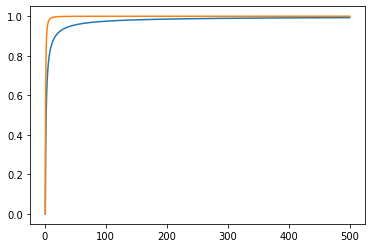

In [16]:
import numpy as np
import scipy.stats as stats
import scipy.signal as signal
import matplotlib.pyplot as plt
import math

def gradients(n, b_min, b_max):
    return np.arange(b_min, b_max, (b_max - b_min)/n)

b_s = gradients(2, 0.8, 3.2)
r_min = 1
r_max = 500
r = np.arange(r_min, r_max, 0.1)
values = [[stats.pareto.cdf(n, b) for n in r] for b in b_s]
for val in values:
    plt.plot(r, val)
    
plt.show()

In [8]:
t = [stats.pareto.rvs(b, size=10000) for b in b_s]
u = t[0]
for v in t[1:]:
    u += v
print(max(u))

451104519.4026532


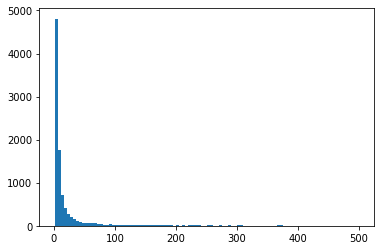

In [9]:
plt.hist(u, bins= 100, range = (r_min, r_max))
plt.show()

0.9552171648590608


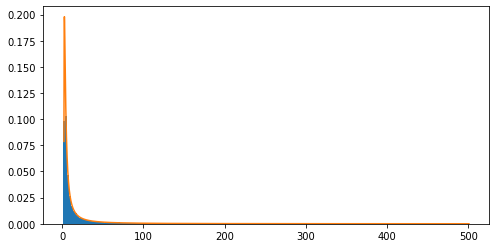

In [14]:
c = [[(stats.pareto.cdf(x+(r[1] - r[0]), b) - stats.pareto.cdf(x, b)) for x in r] for b in b_s]

def extend(vec, vec_2):
    for e in vec_2:
        np.append(vec, e)
    return vec

def normalize(distribution):
    tot = sum(distribution)
    print(tot)
    return distribution / tot

def convolve_distributions(*distributions):
    a = distributions[0]
    for d in distributions[1:]:
        extend(a, np.zeros(len(a)))
        d.extend(np.zeros(len(a)))
        convolution = signal.fftconvolve(a, d)[:len(a)]
        a = normalize(convolution)
    return a
    
cv = convolve_distributions(*c)
    
fig = plt.figure(figsize=(8, 4))
ax  = fig.add_subplot(111)

myHist = ax.hist(u, 200, density=True, range = (r_min
                                                , r_max))
    
#   print(cv)
plt.plot(r + len(b_s) - 1, cv*10)
plt.show()

In [ ]:
np.convolve([5,6,7,8], [1,2,3,4])

In [22]:
pp = [0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995, 0.999]
for p in pp:
    print(stats.pareto.ppf(p, 0.8, 10, 10))

187.8279410038923
432.94850537622517
569.0169943749468
810.9371380449171
1339.5739742362457
3172.2776601683754
7531.206186172778
56244.13251903484
